In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#  读入数据
data_train = pd.read_csv(r'happiness_train_complete.csv',encoding='gbk')
data_test = pd.read_csv(r'happiness_test_complete.csv',encoding='gbk')

In [3]:
data_train['happiness'].unique()

array([ 4,  5,  2,  3,  1, -8], dtype=int64)

In [4]:
#  将-8替换为缺失值并删除
data_train.loc[:,'happiness'] = list(map(lambda x:x if x > 0 else np.nan,data_train.loc[:,'happiness']))

In [5]:
#  删除缺失值
data_train.dropna(subset=['happiness'],axis=0,inplace=True)

In [6]:
#  恢复index
data_train.reset_index(inplace=True)

In [7]:
data_trains = data_train.iloc[:,3:]
data_tests = data_test.iloc[:,1:]

In [8]:
print('Training data shape:',data_trains.shape)
print('Testing data shape:',data_tests.shape)


Training data shape: (7988, 138)
Testing data shape: (2968, 138)


In [9]:
#  合并两个数据集
data = pd.concat([data_trains,data_tests])

In [10]:
data.reset_index(inplace=True)

In [11]:
data = data.iloc[:,1:]

In [12]:
#  导出合并的数据集于本地
data.to_csv(r'我是合并的数据集.csv',index=False)

In [13]:
#  统计每个列的异常值个数
#  取值为负数的定义为异常值。
#  调查数据表不能有负数出现。
columns = data.columns
for column in columns:
    if data[column].dtype != 'object':
        print('%s 的异常值个数为：%d' % (column,len(data.loc[data[column] < 0,:][column])))

survey_type 的异常值个数为：0
province 的异常值个数为：0
city 的异常值个数为：0
county 的异常值个数为：0
gender 的异常值个数为：0
birth 的异常值个数为：0
nationality 的异常值个数为：20
religion 的异常值个数为：142
religion_freq 的异常值个数为：22
edu 的异常值个数为：17
edu_status 的异常值个数为：36
edu_yr 的异常值个数为：1673
income 的异常值个数为：598
political 的异常值个数为：45
join_party 的异常值个数为：120
floor_area 的异常值个数为：0
property_0 的异常值个数为：0
property_1 的异常值个数为：0
property_2 的异常值个数为：0
property_3 的异常值个数为：0
property_4 的异常值个数为：0
property_5 的异常值个数为：0
property_6 的异常值个数为：0
property_7 的异常值个数为：0
property_8 的异常值个数为：0
height_cm 的异常值个数为：0
weight_jin 的异常值个数为：0
health 的异常值个数为：5
health_problem 的异常值个数为：50
depression 的异常值个数为：24
hukou 的异常值个数为：0
hukou_loc 的异常值个数为：0
media_1 的异常值个数为：1
media_2 的异常值个数为：3
media_3 的异常值个数为：3
media_4 的异常值个数为：3
media_5 的异常值个数为：16
media_6 的异常值个数为：19
leisure_1 的异常值个数为：5
leisure_2 的异常值个数为：19
leisure_3 的异常值个数为：19
leisure_4 的异常值个数为：14
leisure_5 的异常值个数为：90
leisure_6 的异常值个数为：19
leisure_7 的异常值个数为：42
leisure_8 的异常值个数为：22
leisure_9 的异常值个数为：25
leisure_10 的异常值个数为：45
leisure_11 的异常值个数为：46
leisure_12 

In [14]:
'''
处理异常值。
'''
'''
（1）.打算将异常值定为缺失值，然后填充。
（2）.直接将异常值删除。
先试试（1）
'''


#  先将异常值替换为缺失值，再统计每个列的异常值个数
columns = data.columns
for column in columns:
    if data[column].dtype != 'object':
        data[column] = list(map(lambda x:x if x > 0 else np.nan,data[column]))

        print('%s 的异常值个数为：%d' % (column,len(data.loc[data[column] < 0,:][column])))

survey_type 的异常值个数为：0
province 的异常值个数为：0
city 的异常值个数为：0
county 的异常值个数为：0
gender 的异常值个数为：0
birth 的异常值个数为：0
nationality 的异常值个数为：0
religion 的异常值个数为：0
religion_freq 的异常值个数为：0
edu 的异常值个数为：0
edu_status 的异常值个数为：0
edu_yr 的异常值个数为：0
income 的异常值个数为：0
political 的异常值个数为：0
join_party 的异常值个数为：0
floor_area 的异常值个数为：0
property_0 的异常值个数为：0
property_1 的异常值个数为：0
property_2 的异常值个数为：0
property_3 的异常值个数为：0
property_4 的异常值个数为：0
property_5 的异常值个数为：0
property_6 的异常值个数为：0
property_7 的异常值个数为：0
property_8 的异常值个数为：0
height_cm 的异常值个数为：0
weight_jin 的异常值个数为：0
health 的异常值个数为：0
health_problem 的异常值个数为：0
depression 的异常值个数为：0
hukou 的异常值个数为：0
hukou_loc 的异常值个数为：0
media_1 的异常值个数为：0
media_2 的异常值个数为：0
media_3 的异常值个数为：0
media_4 的异常值个数为：0
media_5 的异常值个数为：0
media_6 的异常值个数为：0
leisure_1 的异常值个数为：0
leisure_2 的异常值个数为：0
leisure_3 的异常值个数为：0
leisure_4 的异常值个数为：0
leisure_5 的异常值个数为：0
leisure_6 的异常值个数为：0
leisure_7 的异常值个数为：0
leisure_8 的异常值个数为：0
leisure_9 的异常值个数为：0
leisure_10 的异常值个数为：0
leisure_11 的异常值个数为：0
leisure_12 的异常值个数为：0
socialize 的异常值个数为：

In [15]:
#  缺失值情况'
pd.DataFrame(data.isnull().sum()).tail(50)

,0
son,3634
daughter,4976
minor_child,7795
marital,0
marital_1st,1894
s_birth,2365
marital_now,2931
s_edu,2407
s_political,2387
s_hukou,2386


In [16]:
#  将缺失值较大的特征删除
data.drop(['edu_yr','edu_other','join_party','property_0',
          'property_1','property_2','property_3','property_4','property_5','property_6','property_7',
           'property_8','property_other','work_status','work_yr','work_type','work_manage','invest_0',
          'invest_1','invest_2','invest_3','invest_4','invest_5','invest_6','invest_7','invest_8',
           'invest_other','minor_child','daughter','s_work_status','s_work_type',
           'f_birth','m_birth','trust_11','trust_12'],axis=1,inplace=True)

In [17]:
data.shape

(10956, 103)

In [18]:
# '''
# print(data['birth'].min())
# print(data['birth'].max())
# print(1997-1921)
# '''
# #  10年为一个区间，新加入births特征

bir = []
for value in data['birth']:
    
    if 1921 <= value < 1931:
        bir.append(1)
    elif 1931 <= value < 1941:
        bir.append(2)
    elif 1941 <= value < 1951:
        bir.append(3)
    elif 1951 <= value < 1961:
        bir.append(4)
    elif 1961 <= value < 1971:
        bir.append(5)
    elif 1971 <= value < 1981:
        bir.append(6)
    elif 1981 <= value <= 1991:
        bir.append(7)
    elif 1991 <= value <= 2001:
        bir.append(8)
data['birth'] = pd.DataFrame(bir)

In [19]:
#  依据特征income创造收入人群称呼
incomes = []
for income in data['income']:
    if 0 <= income < 200000:
        incomes.append(1)  #  困难家庭
    elif 200000 <= income < 350000:
        incomes.append(2)  # 贫困家庭
    elif 350000 <= income < 600000:
        incomes.append(3)  #贫穷家庭
    elif 600000 <= income < 800000:
        incomes.append(4)  #小康家庭
    elif 800000 <= income < 2000000:
        incomes.append(5)  #中产家庭
    elif 2000000 <= income < 5000000:
        incomes.append(6)  #富裕家庭
    elif 5000000 <= income:
        incomes.append(7)  #富人家庭
        
data['income'] = pd.DataFrame(incomes)

In [20]:
#  依据特征family_income创造收入人群称呼
family_incomes = []
for income in data['family_income']:
    if 0 <= income < 200000:
        family_incomes.append(1)  #  困难家庭
    elif 200000 <= income < 350000:
        family_incomes.append(2)  # 贫困家庭
    elif 350000 <= income < 600000:
        family_incomes.append(3)  #贫穷家庭
    elif 600000 <= income < 800000:
        family_incomes.append(4)  #小康家庭
    elif 800000 <= income < 2000000:
        family_incomes.append(5)  #中产家庭
    elif 2000000 <= income < 5000000:
        family_incomes.append(6)  #富裕家庭
    elif 5000000 <= income:
        family_incomes.append(7)  #富人家庭
        
data['family_income'] = pd.DataFrame(family_incomes)

In [21]:
#  依据特征s_income创造收入人群称呼
s_incomes = []
for income in data['s_income']:
    if 0 <= income < 200000:
        s_incomes.append(1)  #  困难家庭
    elif 200000 <= income < 350000:
        s_incomes.append(2)  # 贫困家庭
    elif 350000 <= income < 600000:
        s_incomes.append(3)  #贫穷家庭
    elif 600000 <= income < 800000:
        s_incomes.append(4)  #小康家庭
    elif 800000 <= income < 2000000:
        s_incomes.append(5)  #中产家庭
    elif 2000000 <= income < 5000000:
        s_incomes.append(6)  #富裕家庭
    elif 5000000 <= income:
        s_incomes.append(7)  #富人家庭
        
data['s_income'] = pd.DataFrame(s_incomes)

In [22]:
#  依据特征inc_exp创造消费人群称呼
inc_exps = []
for income in data['inc_exp']:
    if 0 <= income < 200000:
        inc_exps.append(1)  #  困难家庭
    elif 200000 <= income < 350000:
        inc_exps.append(2)  # 贫困家庭
    elif 350000 <= income < 600000:
        inc_exps.append(3)  #贫穷家庭
    elif 600000 <= income < 800000:
        inc_exps.append(4)  #小康家庭
    elif 800000 <= income < 2000000:
        inc_exps.append(5)  #中产家庭
    elif 2000000 <= income < 5000000:
        inc_exps.append(6)  #富裕家庭
    elif 5000000 <= income:
        inc_exps.append(7)  #富人家庭
        
data['inc_exp'] = pd.DataFrame(inc_exps)

In [23]:
data.drop(['survey_time','survey_type','province','city','county',
          'marital_1st','s_birth','marital_now'],axis=1,inplace=True)

In [24]:
data.shape

(10956, 95)

# 用随机森林回归填充缺失值

In [25]:
#  缺失值情况'
pd.DataFrame(data.isnull().sum())

#  这下可以放心填充了。

,0
gender,0
birth,1
nationality,20
religion,1321
religion_freq,22
...,...
public_service_5,670
public_service_6,424
public_service_7,542
public_service_8,699


In [26]:
'''
把有缺失值的特征都拿出来。
'''
a = pd.DataFrame(data.isnull().sum() != 0)
a = a[a.values == True]
a.index

Index(['birth', 'nationality', 'religion', 'religion_freq', 'edu',
       'edu_status', 'income', 'political', 'floor_area', 'health',
       'health_problem', 'depression', 'hukou_loc', 'media_1', 'media_2',
       'media_3', 'media_4', 'media_5', 'media_6', 'leisure_1', 'leisure_2',
       'leisure_3', 'leisure_4', 'leisure_5', 'leisure_6', 'leisure_7',
       'leisure_8', 'leisure_9', 'leisure_10', 'leisure_11', 'leisure_12',
       'socialize', 'relax', 'learn', 'social_neighbor', 'social_friend',
       'socia_outing', 'equity', 'class', 'class_10_before', 'class_10_after',
       'class_14', 'insur_1', 'insur_2', 'insur_3', 'insur_4', 'family_income',
       'family_m', 'family_status', 'house', 'car', 'son', 's_edu',
       's_political', 's_hukou', 's_income', 's_work_exper', 'f_edu',
       'f_political', 'f_work_14', 'm_edu', 'm_political', 'm_work_14',
       'status_peer', 'status_3_before', 'view', 'inc_ability', 'inc_exp',
       'trust_1', 'trust_2', 'trust_3', 'trust_4'

In [27]:
#  把专门的缺失值的特征跳出来，形成一个新的表格。
datas_pre = pd.DataFrame()
for col in a.index:
    datas_pre[col] = data[col]

In [28]:
datas_pre.shape

(10956, 89)

In [29]:
np.argsort(datas_pre.isnull().sum(axis=0)).values
#  即第6个特征【从0开始】的缺失值最少，就从它开始填充吧。

array([ 0, 13,  8, 16, 15, 14, 31, 12,  9, 19, 50, 79, 22, 17,  4, 24, 21,
       18, 20,  1, 32, 26,  3, 11, 27, 33, 47, 30, 25, 28,  7, 29, 10, 42,
       64, 48, 37, 72, 63, 36, 23, 38, 68, 39, 43, 41, 61, 78, 44, 45, 58,
       65, 81, 74, 69, 80, 62, 59, 85, 83, 88, 86, 40, 76, 84, 60, 87, 82,
       57, 49, 46, 34, 35, 66,  2, 75, 70, 71, 67, 73,  5,  6, 56, 54, 53,
       52, 77, 51, 55], dtype=int64)

In [30]:
#  随机森林回归填充的思路就是从缺失值数目最少的开始填充
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

datas_pre['inc_ability'] = pd.to_numeric(datas_pre['inc_ability'])

y_full = data_train['happiness']
data_pre_reg = datas_pre.copy()
sort_index = np.argsort(data_pre_reg.isnull().sum(axis=0)).values

data_pre_reg.columns = [x for x in range(len(data_pre_reg.columns))]

In [31]:
#慢
# %%time
# for i in sort_index:
#     df = data_pre_reg
#     #  构建新标签
#     fillc = df.iloc[:,i]
#     #  构建新特征矩阵
#     df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
#     #  对于新的特征矩阵中，用0进行填充
#     imp_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
#     df_0 = pd.DataFrame(imp_0.fit_transform(df))
#     #  挑选出不缺失的标签
#     Ytrain = fillc[fillc.notnull()]
#     #  需要Ytest的index啊
#     Ytest = fillc[fillc.isnull()]
#     Xtrain = df_0.iloc[Ytrain.index,:]
#     Xtest = df_0.iloc[Ytest.index,:]
#     #  建立随机森林回归模型
#     rfc = RandomForestRegressor(n_estimators=10)
#     rfc = rfc.fit(Xtrain,Ytrain)
#     Ypredict = rfc.predict(Xtest)
    
#     data_pre_reg.loc[data_pre_reg.iloc[:,i].isnull(),i] = Ypredict

In [32]:
imp_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=-8)
data_pre_reg = pd.DataFrame(imp_0.fit_transform(data_pre_reg))

In [33]:
data['happiness'] = data_train['happiness']

In [34]:

'''
nice  成功全部填充哦！！！！
'''
data_pre_reg.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
84    0
85    0
86    0
87    0
88    0
Length: 89, dtype: int64

In [35]:
#  将data_pre_reg归进去data里。
data_pre_reg.columns = a.index

for column in data_pre_reg.columns:
    data[column] = data_pre_reg[column]

In [36]:
'''
成功替换回去了。可以放心使用data建模了。
'''
data.isnull().sum()

gender                 0
birth                  0
nationality            0
religion               0
religion_freq          0
                    ... 
public_service_6       0
public_service_7       0
public_service_8       0
public_service_9       0
happiness           2968
Length: 96, dtype: int64

In [37]:
data.to_csv(r'完整版啊.csv',index=False)

In [38]:
data.columns

Index(['gender', 'birth', 'nationality', 'religion', 'religion_freq', 'edu',
       'edu_status', 'income', 'political', 'floor_area', 'height_cm',
       'weight_jin', 'health', 'health_problem', 'depression', 'hukou',
       'hukou_loc', 'media_1', 'media_2', 'media_3', 'media_4', 'media_5',
       'media_6', 'leisure_1', 'leisure_2', 'leisure_3', 'leisure_4',
       'leisure_5', 'leisure_6', 'leisure_7', 'leisure_8', 'leisure_9',
       'leisure_10', 'leisure_11', 'leisure_12', 'socialize', 'relax', 'learn',
       'social_neighbor', 'social_friend', 'socia_outing', 'equity', 'class',
       'class_10_before', 'class_10_after', 'class_14', 'work_exper',
       'insur_1', 'insur_2', 'insur_3', 'insur_4', 'family_income', 'family_m',
       'family_status', 'house', 'car', 'son', 'marital', 's_edu',
       's_political', 's_hukou', 's_income', 's_work_exper', 'f_edu',
       'f_political', 'f_work_14', 'm_edu', 'm_political', 'm_work_14',
       'status_peer', 'status_3_before', 'view

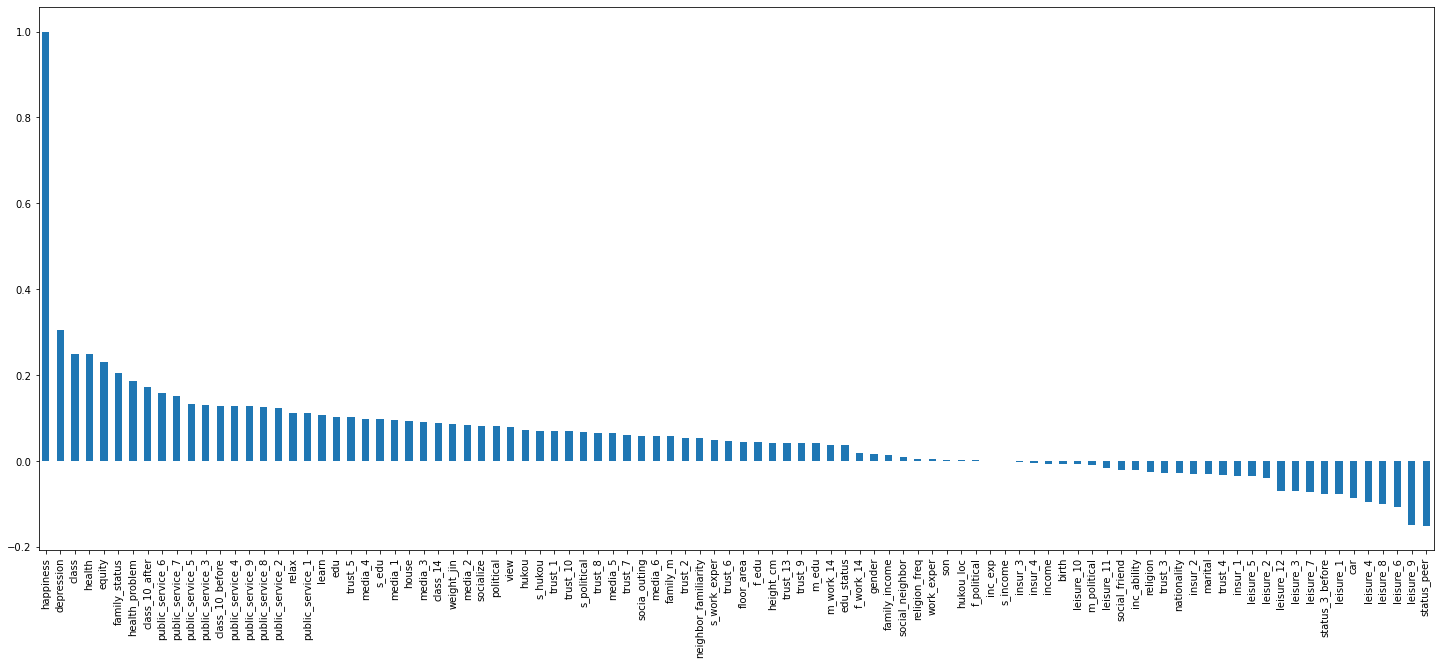

In [39]:
#  相关性分析
plt.figure(figsize=(25,10))
data.corr()['happiness'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [40]:
#  剔除相关度较低的特征
data.drop(['religion_freq','work_exper','income','inc_exp','s_hukou'],axis=1,inplace=True)

In [41]:
X_train = data.iloc[:7988,:]

In [42]:
X_test = data.iloc[7988:,:]

In [43]:
X_test.to_csv(r'test_data_complete.csv',index=False)

In [44]:
train_data_complete = pd.DataFrame(X_train,y_full)

In [45]:
train_data_complete.to_csv(r'train_data_complete.csv',index=False)

# 模型建立与调参数

In [46]:
#  切分数据集
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X_train,y_full,test_size=0.3,random_state=1227)

## 一般模型的建立与调参数

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor


model_names = [
    #'linear_reg',
    #'RandomForestRegressor',
    'GradientBoostingRegressors',
    'svr',
    'KNeighborsRegressors',
    'AdaBoostRegressors',
    #'XGBoost',
    #'lightGBM'
    ]

models = [
   # LinearRegression(),
    #RandomForestRegressor(random_state=666),
    GradientBoostingRegressor(random_state=666),
    SVR(),
    KNeighborsRegressor(),
    AdaBoostRegressor(random_state=666),
    
    ]

#  需要调节的参数
parm_grids = [
    
#     {'RandomForestRegressor__max_depth':[3,6,9],'RandomForestRegressor__n_estimators':[10,50,70],
#     'RandomForestRegressor__min_samples_split':[3,5,7,9],'RandomForestRegressor__min_samples_leaf':range(2,5)
#     },
    {'GradientBoostingRegressors__n_estimators':[10,50,100],
     'GradientBoostingRegressors__max_depth':range(2,9),
    'GradientBoostingRegressors__min_samples_split':[3,5,7,9],
     'GradientBoostingRegressors__min_samples_leaf':range(2,5)},
    {'svr__degree':[2,3,4]},
    {'KNeighborsRegressors__n_neighbors':[2,5,7,9,10]},
    {'AdaBoostRegressors__n_estimators':[2,9,10,13,15,20,50,100]}
    
    ]

def Grid(pipeline,train_x,train_y,test_x,test_y,param_grid):
    response = {}
    gridsearch = GridSearchCV(pipeline,param_grid=param_grid,cv=3)
    search = gridsearch.fit(train_x,train_y)
    print('最优参数：',search.best_params_)
    print('最优参数(R^2)：%0.4lf' % search.best_score_)
    predict_y = gridsearch.predict(test_x)
    mse = mean_squared_error(ytest,predict_y).mean()
    response['mse'] = mse
    return response

In [48]:
# %%time
# for model,model_name,parm_grid in zip(models,model_names,parm_grids):
#     #print(model_name,model)
#     pipeline = Pipeline([
#     #('sta',StandardScaler()),
#     #('pca',PCA()),
#     (model_name,model),
#     ]
#     )
    
#     result = Grid(pipeline,Xtrain,ytrain,Xtest,ytest,parm_grid)
#     print(result)

# XGBoost与lightGBM的建立与参数

In [49]:
#  试试两大神器
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [50]:
#  试试默认参数下的xgboost
xgboo = XGBRegressor().fit(Xtrain,ytrain)
predict = xgboo.predict(Xtest)
print('XGBOOST的mse为:',mean_squared_error(ytest,predict))
print('XGBOOST的r2为:',r2_score(ytest,predict))

XGBOOST的mse为: 2.3408990205392295e-10
XGBOOST的r2为: 0.9999999996335854


In [51]:
#  试试默认参数下的lightlgbm
lgbm = LGBMRegressor().fit(Xtrain,ytrain)
predict = lgbm.predict(Xtest)
print('LGBM的mse为:',mean_squared_error(ytest,predict))
print('LGBM的r2为:',r2_score(ytest,predict))

LGBM的mse为: 4.514718835010498e-10
LGBM的r2为: 0.9999999992933234


In [52]:
#  将数据集转化为xgboost所需的格式
import xgboost as xgb
train_d = xgb.DMatrix(Xtrain,ytrain)

In [53]:
#  默认随机挑选参数
xgb1 = XGBRegressor(max_depth=3,
                     learning_rate=0.1,
                     n_estimators=5000,
                     silent=False,
                     booster='gbtree',
                     objective='reg:squarederror',
                     n_jobs=4,
                     gamma=0,
                     min_child_weight=1,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     seed=7)

#  利用cv函数选择最佳的树的数量。
xgb.cv(xgb1.get_xgb_params(),train_d,xgb1.get_xgb_params()['n_estimators'],nfold=5,
      metrics='rmse',early_stopping_rounds=70)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3.112892,0.006394,3.112799,0.025540
1,2.801915,0.005754,2.801818,0.022991
2,2.524641,0.007728,2.524487,0.020901
3,2.275479,0.012218,2.275057,0.020461
4,2.053757,0.016673,2.053142,0.021882
...,...,...,...,...
3516,0.000999,0.000372,0.006901,0.002337
3517,0.000998,0.000372,0.006901,0.002338
3518,0.000998,0.000372,0.006901,0.002338
3519,0.000998,0.000371,0.006901,0.002337


In [54]:
#  更新树的数量的参数并计算mse
xgb1 = XGBRegressor(max_depth=3,
                     learning_rate=0.1,
                     n_estimators=149,
                     silent=False,
                     objective='reg:squarederror',
                     booster='gbtree',
                     n_jobs=4,
                     gamma=0,
                     min_child_weight=1,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     seed=7)
#  然后训练模型、测试集预测、获得mse得分
xgb1_best1 = xgb1.fit(Xtrain,ytrain)

predict = xgb1_best1.predict(Xtest)
print('The best mse:',mean_squared_error(ytest,predict))
print('The best r2:',r2_score(ytest,predict))

The best mse: 0.00010119662518236292
The best r2: 0.9998415996834323


<Figure size 1080x648 with 0 Axes>

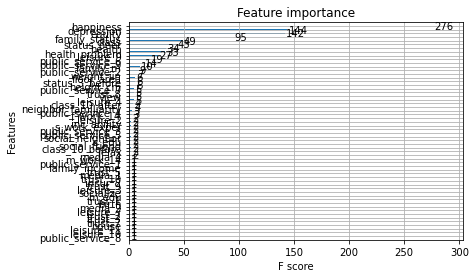

In [55]:
#  看看特征的重要性
plt.figure(figsize=(15,9))
xgb.plot_importance(xgb1_best1)
plt.show()


In [57]:
'''
确定max_depth和min_weight参数
我们先对这两个参数调优，因为它们对最终结果有很大的影响。
首先，我们先大范围的粗调，
然后再小范围的细调,接下来使用高负荷的栅格搜索了（gird search）
'''

from sklearn.model_selection import GridSearchCV

param = {
    'max_depth':[1,2,3,4,5,6],
    'min_child_weight':[1,2,3,4,5,6]
        }

grid = GridSearchCV(xgb1,param_grid=param,cv=5)
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=0,
                                    max_depth=3, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=149, n_jobs=4,
                                    n...
                                    objective='reg:squarederror',
                                    random_state=7, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=7, silent=False,
                                    subsample=0.8, tree_method=None

In [58]:
print('The Best Params:',grid.best_params_)
print('The Best Score:',grid.best_score_)

The Best Params: {'max_depth': 2, 'min_child_weight': 2}
The Best Score: 0.9999436560537411


In [59]:
#  gamma参数调优

xgb1 = XGBRegressor(max_depth=6,
                     learning_rate=0.1,
                     n_estimators=149,
                     silent=False,
                     objective='reg:squarederror',
                     booster='gbtree',
                     n_jobs=4,
                     gamma=0,
                     min_child_weight=6,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     seed=7)


param_grid = {'gamma':[0,1,2,3,4,5,6,7,8,9]}
grid_search = GridSearchCV(xgb1,param_grid,cv=5)

grid_search.fit(Xtrain,ytrain)
print('best_params:',grid_search.best_params_)
print('best_score:',grid_search.best_score_)



best_params: {'gamma': 0}
best_score: 0.9995482959278078


In [ ]:
#  细化参数范围
param_grid = {'gamma':[i/10.0 for i in range(0,80)]}
grid_search = GridSearchCV(xgb1,param_grid,cv=5)

grid_search.fit(Xtrain,ytrain)
print('best_params:',grid_search.best_params_)
print('best_score:',grid_search.best_score_)

In [ ]:
#  调整subsample与colsample_bytree参数


xgb1 = XGBRegressor(max_depth=6,
                     learning_rate=0.1,
                     n_estimators=149,
                     silent=False,
                     objective='reg:squarederror',
                     booster='gbtree',
                     n_jobs=4,
                     gamma=5.4,
                     min_child_weight=6,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     seed=7)
param_grid = {'subsample':[i/10.0 for i in range(5,11)],
             'colsample_bytree':[i/10.0 for i in range(1,11)]}
grid_search = GridSearchCV(xgb1,param_grid,iid=False,cv=5)

grid_search.fit(Xtrain,ytrain)
print('best_params:',grid_search.best_params_)
print('best_score:',grid_search.best_score_)

In [ ]:
#  调整正则化参数

xgb1 = XGBRegressor(max_depth=6,
                     learning_rate=0.1,
                     n_estimators=149,
                     silent=False,
                     objective='reg:squarederror',
                     booster='gbtree',
                     n_jobs=4,
                     gamma=5.4,
                     min_child_weight=6,
                     subsample=0.8,
                     colsample_bytree=1,
                     seed=7)

param_grid = {'reg_lambda':[i/100.0 for i in range(70,200)]}
grid_search = GridSearchCV(xgb1,param_grid,iid=False,cv=5)

grid_search.fit(Xtrain,ytrain)
print('best_params:',grid_search.best_params_)
print('best_score:',grid_search.best_score_)


In [ ]:
#   最优参数
xgb1 = XGBRegressor(max_depth=6,
                     learning_rate=0.1,
                     n_estimators=149,
                     silent=False,
                     objective='reg:squarederror',
                     booster='gbtree',
                     n_jobs=4,
                     gamma=5.4,
                     min_child_weight=6,
                     subsample=0.8,
                     colsample_bytree=1,
                     reg_lambda=1.39,
                     seed=7)
#  然后训练模型、测试集预测、获得mse得分
xgb1_best1 = xgb1.fit(Xtrain,ytrain)

predict = xgb1_best1.predict(Xtest)
print('The best mse:',mean_squared_error(ytest,predict))
print('The best r2:',r2_score(ytest,predict))


In [ ]:
##  在最好的参数的基础上加大树的数量同时减少学习率
xgb1 = XGBRegressor(max_depth=6,
                     learning_rate=0.01,
                     n_estimators=2000,
                     silent=False,
                     objective='reg:squarederror',
                     booster='gbtree',
                     n_jobs=4,
                     gamma=5.4,
                     min_child_weight=6,
                     subsample=0.8,
                     colsample_bytree=1,
                     reg_lambda=1.39,
                     seed=7)


xgb.cv(xgb1.get_xgb_params(),train_d,xgb1.get_xgb_params()['n_estimators'],nfold=5,
      metrics='rmse',early_stopping_rounds=60)

In [ ]:
##  最好的参数的基础上加大树的数量同时寻找最佳的学习率
for i in [0.001,0.005,0.01,0.012,0.015,0.018]:
    xgb1 = XGBRegressor(max_depth=6,
                     learning_rate=0.01,
                     n_estimators=1565,
                     silent=False,
                     objective='reg:squarederror',
                     booster='gbtree',
                     n_jobs=4,
                     gamma=5.4,
                     min_child_weight=6,
                     subsample=0.8,
                     colsample_bytree=1,
                     reg_lambda=1.39,
                     seed=7)

    #  然后训练模型、测试集预测、获得r2得分
    xgb1_best2 = xgb1.fit(Xtrain,ytrain)

    predicts = xgb1_best2.predict(Xtest)
    print(i)
    print('最优模型的mse:',mean_squared_error(ytest,predicts))
    print('最优模型的r2:',r2_score(ytest,predicts))

In [ ]:
#   最优参数
xgb1 = XGBRegressor(max_depth=6,
                     learning_rate=0.01,
                     n_estimators=1565,
                     silent=False,
                     objective='reg:squarederror',
                     booster='gbtree',
                     n_jobs=4,
                     gamma=5.4,
                     min_child_weight=6,
                     subsample=0.8,
                     colsample_bytree=1,
                     reg_lambda=1.39,
                     seed=7)

    #  然后训练模型、测试集预测、获得r2得分
xgb1_best2 = xgb1.fit(Xtrain,ytrain)

predicts = xgb1_best2.predict(Xtest)

print('最优模型的mse:',mean_squared_error(ytest,predicts))
print('最优模型的r2:',r2_score(ytest,predicts))


In [ ]:
model = xgb1.fit(Xtrain,ytrain)

In [ ]:
model.save_model(r'The Best Model')

In [ ]:
pre = model.predict(X_test)

In [ ]:
pd.DataFrame(pre).to_csv(r'resultss.csv',index=False)